<a href="https://colab.research.google.com/github/OleFlow/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

- Author: Olebogeng Queeneth Mosito

##Project Overview


##Load and Inspect Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load data from CSV file
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')

# Summary of DataFrame's columns
print("Column info:")
print(df.info())

print("First few rows of the data:")
print(df.head())



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
First few rows of the data:

##Clean Data

In [ ]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df.dropna(subset=['Outlet_Size'], inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.head())

num_rows = df.shape[0]
num_columns = df.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

data_types = df.dtypes

print(data_types)

duplicates = df.duplicated()

if duplicates.any():
    print("Duplicates found.")
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)

missing_values = df.isnull().sum()

print(missing_values)

df_filled = df.fillna("Unknown")
placeholder_values = {
    'Outlet_Size': 'Not Available',
    'Item_Weight': 0
}

df_filled = df.fillna(placeholder_values)

missing_values = df_filled.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values remain.")
else:
    print("Missing values still exist.")
    print(missing_values)


# Define a mapping dictionary for inconsistent categories
category_mapping = {
    'LF': 'Low Fat',
    'reg': 'Regular',

}

# Use the mapping dictionary to replace inconsistent categories
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(category_mapping)

numerical_columns = df.select_dtypes(include=['float64', 'int64'])


min_values = numerical_columns.min()
print(min_values)

max_values = numerical_columns.max()
print(max_values)

mean_values = numerical_columns.mean()

print(mean_values)

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           NCD19        8.930          Low Fat         0.000000   
4           FDP36       10.395          Regular         0.000000   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0         Dairy  249.8092            OUT049                       1999   
1   Soft Drinks   48.2692            OUT018                       2009   
2          Meat  141.6180            OUT049                       1999   
3     Household   53.8614            OUT013                       1987   
4  Baking Goods   51.4008            OUT018                       2009   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1          3735.138

##Explanatory Data Analysis

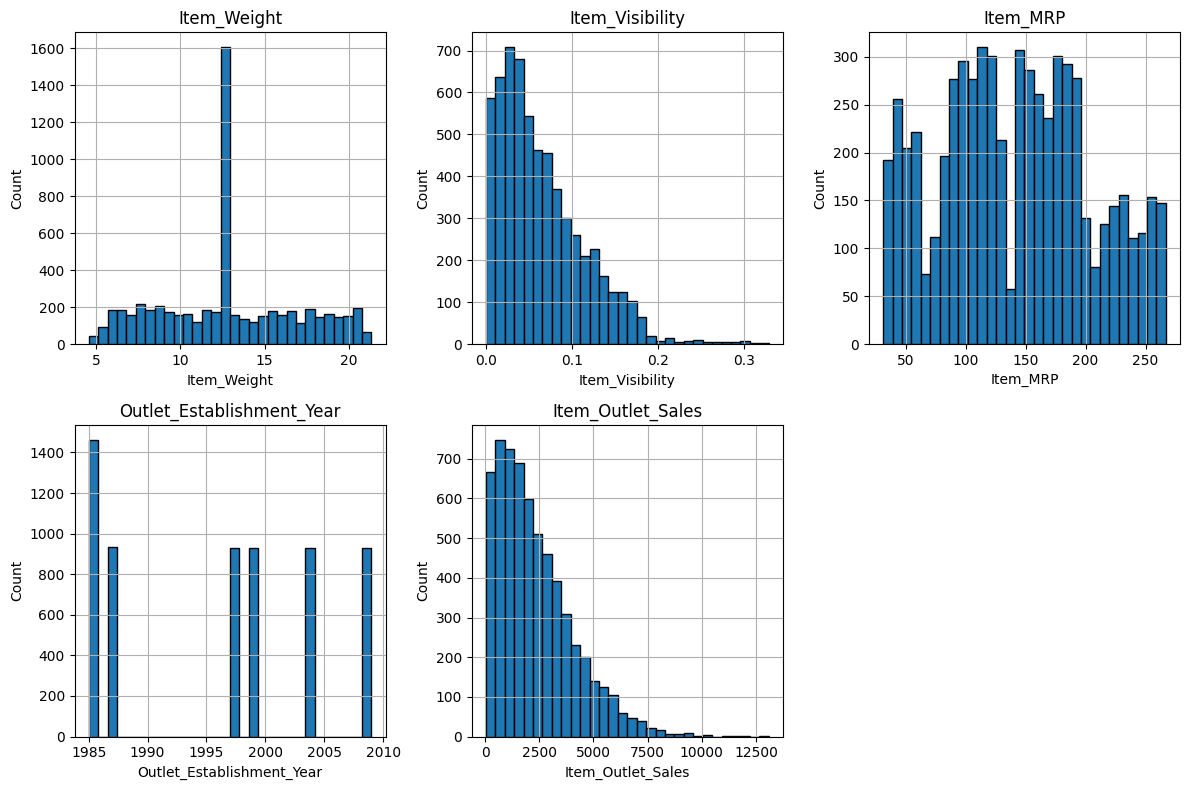

In [ ]:
#Histograms to view the distributions of numerical features in your dataset.
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    df[feature].hist(bins=30, edgecolor='k')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


-From the histograms, we can observe the following:

* Item_Weight: The distribution may show some central tendency, with most weights clustered around a certain value, possibly with some outliers on the higher or lower end.

* Item_Visibility: This may be right-skewed, with a few items having very high visibility and the majority having lower visibility.


* Outlet_Establishment_Year: The distribution may show the number of outlets established over the years, possibly with a higher frequency in recent years.

* Item_Outlet_Sales: This could be right-skewed, with most items having relatively lower sales and a few items with significantly higher sales.



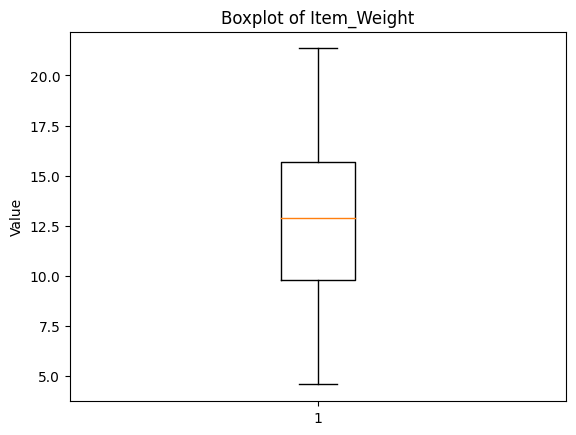

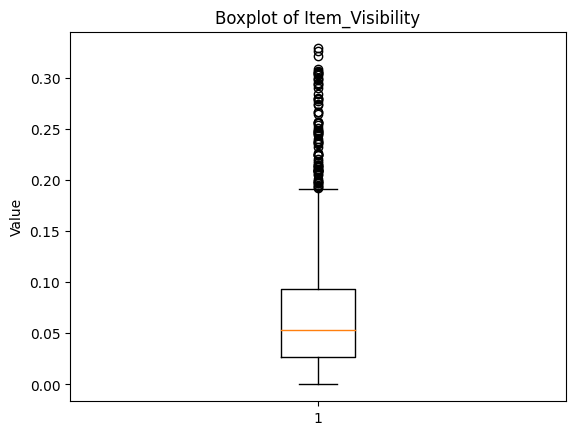

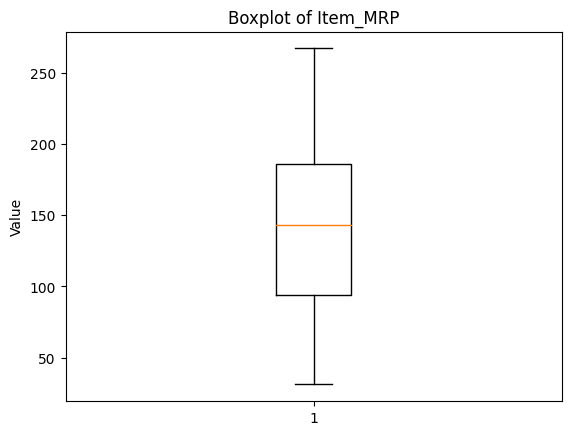

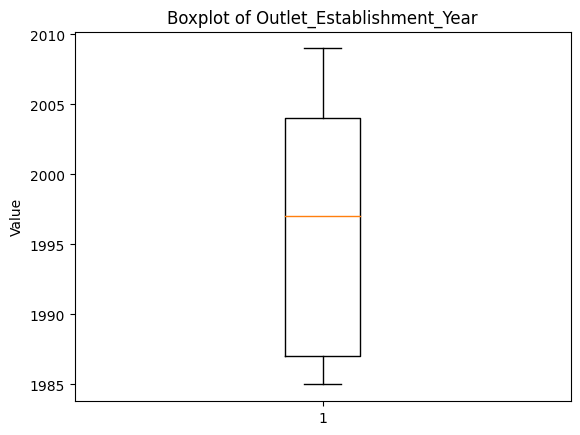

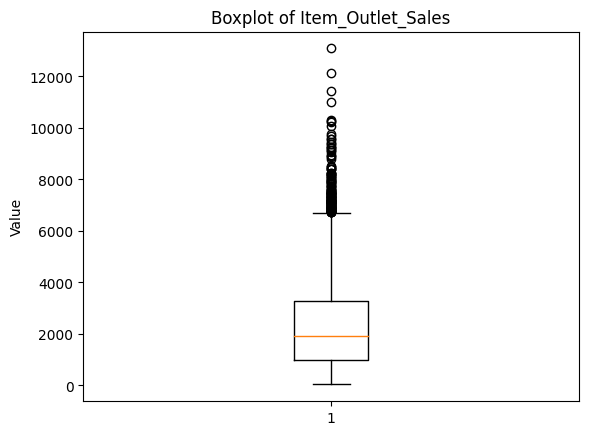

In [ ]:
#Boxplots to view statistical summaries of numerical features in your dataset.

numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Creating boxplots for each numerical feature
for feature in numerical_features:
    plt.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')
    plt.show()

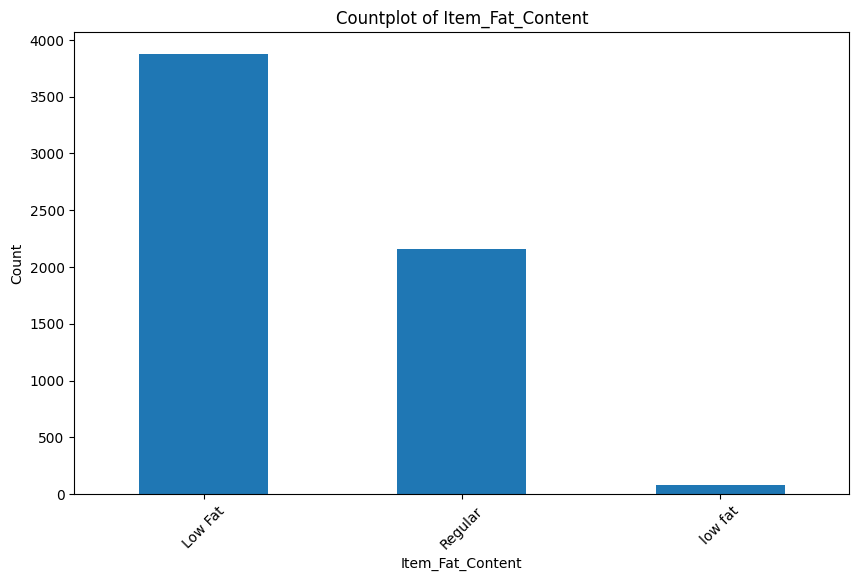

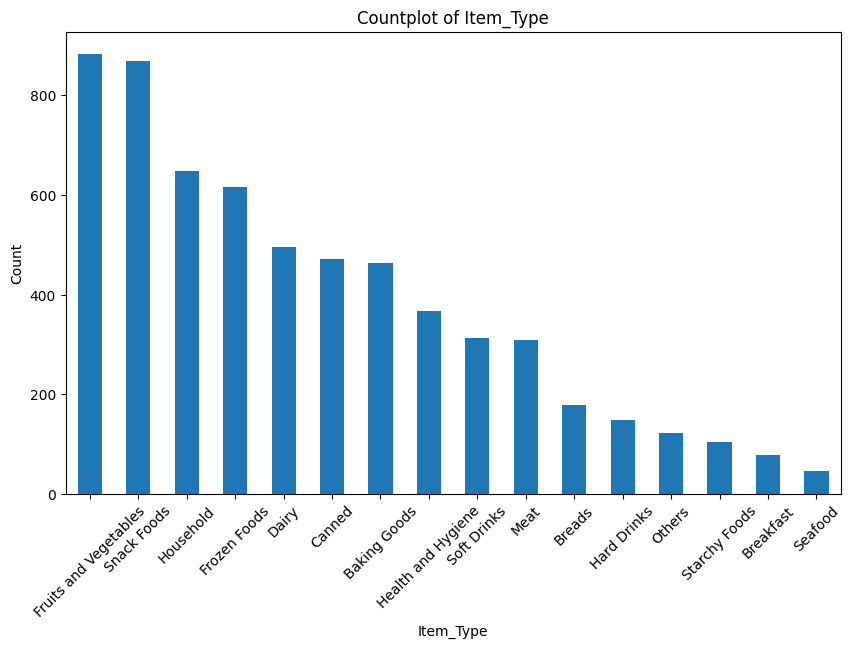

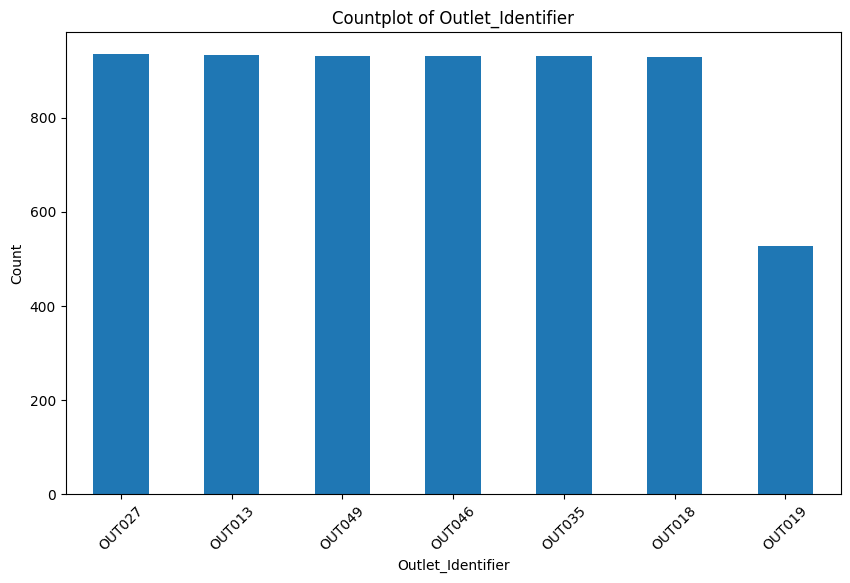

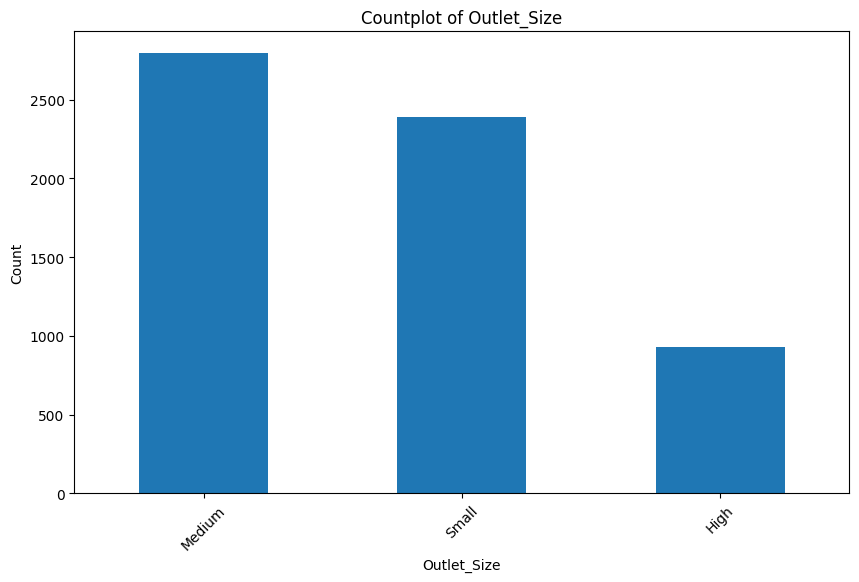

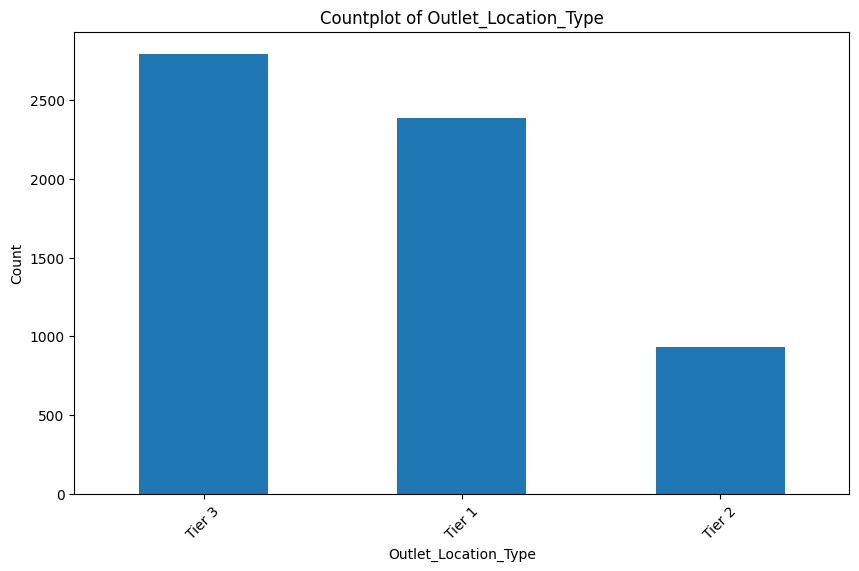

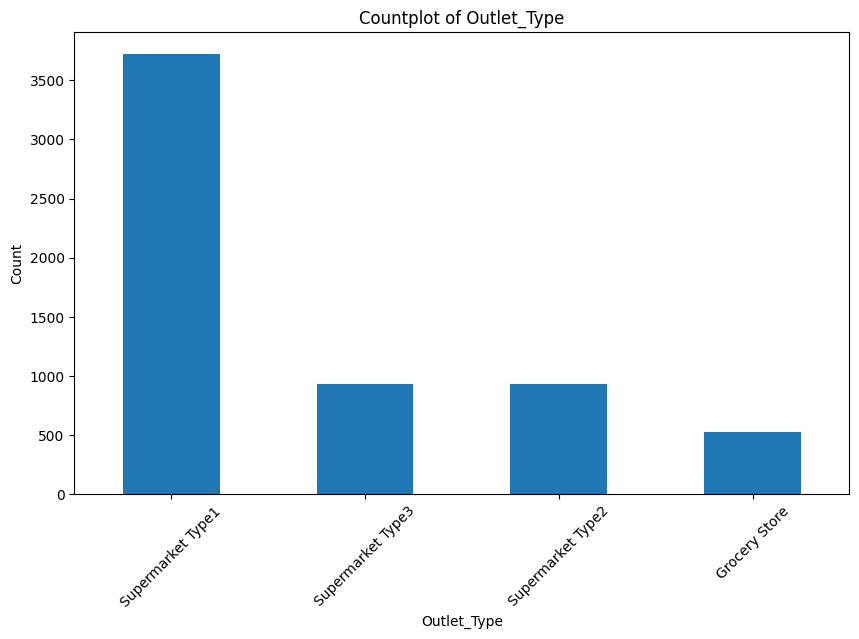

In [ ]:
#Countplots to view the frequency of each class of categorial features in your dataset.
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Creating countplots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Countplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

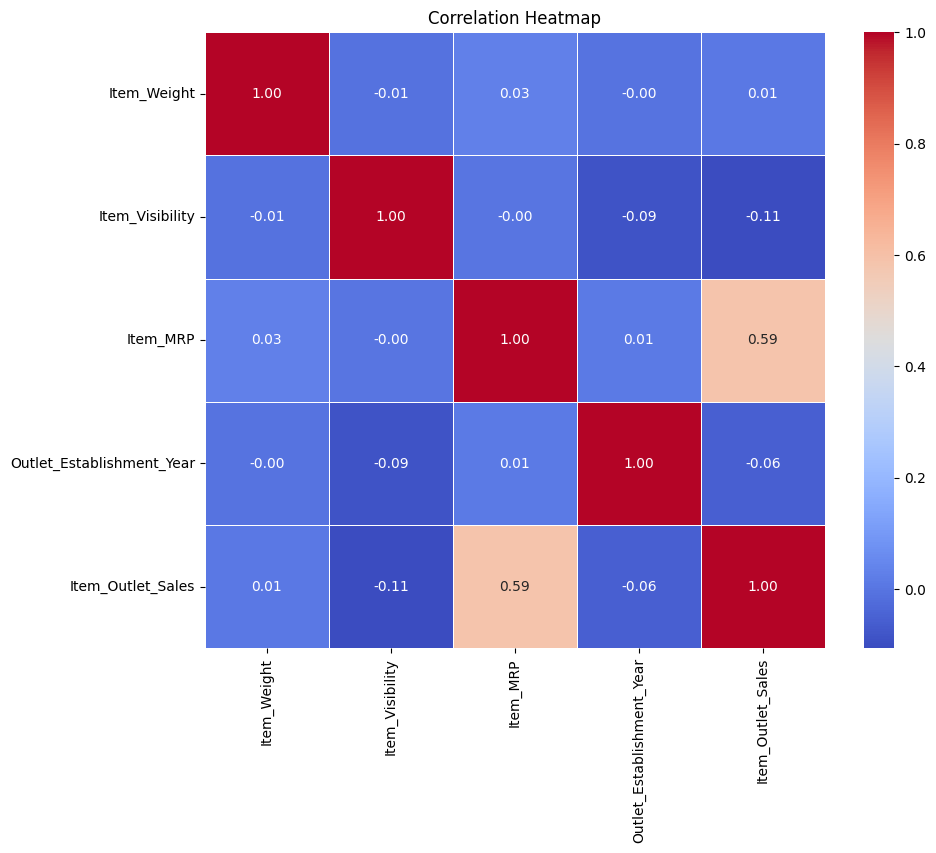

In [ ]:
#Heatmap to view the correlation between features.
correlation_matrix = df.corr(numeric_only = True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##Exploratory Data Analysis


# Machine Learning- Part 5


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load data from CSV file
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/sales_predictions_2023 (1).csv')

# Summary of DataFrame's columns
print("Column info:")
print(df.info())
print("Data:")
print(df.head())

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
Data:
  Item_Identifier  It

In [33]:
# Drop duplicates and store the result in a new DataFrame
df.drop_duplicates()
# Print the DataFrame without duplicates
print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [34]:
# Step 1: Identify Inconsistencies

# Loop through categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

# Step 2: Standardize Values

# Convert all values to lowercase in categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.lower())

# Step 3: Handle Unexpected Values

# Replace unexpected values with a default value (e.g., 'unknown')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['lf', 'low fat'], 'low fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'regular')

# Print the DataFrame after handling inconsistencies
print(df)

Unique values in 'Item_Identifier': ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Unique values in 'Item_Fat_Content': ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique values in 'Item_Type': ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Unique values in 'Outlet_Identifier': ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Unique values in 'Outlet_Size': ['Medium' nan 'High' 'Small']
Unique values in 'Outlet_Location_Type': ['Tier 1' 'Tier 3' 'Tier 2']
Unique values in 'Outlet_Type': ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              fda15        9.300          low fat         0.016047   
1              drc01        5.920          regular         0.019278   

In [35]:
#Replace null values in numeric columns with mean
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Replace null values in categorical columns with a specified value
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Print the DataFrame after handling null values
print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              fda15        9.300          low fat         0.016047   
1              drc01        5.920          regular         0.019278   
2              fdn15       17.500          low fat         0.016760   
3              fdx07       19.200          regular         0.000000   
4              ncd19        8.930          low fat         0.000000   
...              ...          ...              ...              ...   
8518           fdf22        6.865          low fat         0.056783   
8519           fds36        8.380          regular         0.046982   
8520           ncj29       10.600          low fat         0.035186   
8521           fdn46        7.210          regular         0.145221   
8522           drg01       14.800          low fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     dairy  249.8092            out049   
1               soft drinks  

In [36]:

# Define features (X) and target (y)
X = df.drop(["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier"], axis=1)  # Drop category columns
y = df["Item_Outlet_Sales"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
numerical_cols = ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year"]

# Create preprocessing pipelines for categorical and numerical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine the preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# Fit and transform the preprocessing on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the testing data using the same preprocessing steps
X_test_preprocessed = preprocessor.transform(X_test)





